In [1]:
import ee
import pandas as pd
import os
import xarray as xr

In [ ]:
ee.Authenticate()

In [3]:
ee.Initialize()

In [2]:
stations = pd.read_excel("Stationdetails.xlsx")

In [3]:
stations

,station_name,start_year,end_year,Name,Country,"Position (lon,lat)",Site type (IGBP),Elevation above sea
0,BE-Bra,1996,2020,Brasschaat,Belgium (BE),"4.51984,51.30761",evergreen needleleaf forests,160 (m)
1,BE-Dor,2011,2020,Dorinne,Belgium (BE),"4.968113,50.311874",grasslands,2530
2,BE-Lon,2004,2020,Lonzee,Belgium (BE),"4.746234,50.55162",croplands,1700
3,BE-Maa,2016,2020,Maasmechelen,Belgium (BE),"5.631851,50.97987",closed shrublands,870
4,BE-Vie,1996,2020,Vielsalm,Belgium (BE),"5.998099,50.304962",mixed forests,4900
...,...,...,...,...,...,...,...,...
63,CH-Dav,1997,2020,Davos,Switzerland (CH),"9.85591,46.81533",evergreen needleleaf forests,NaN
64,CH-Aws,2006,2020,Alp Weissenstein,Switzerland (CH),"9.790417,46.583194",grasslands,NaN
65,CH-Cha,2005,2020,Chamau,Switzerland (CH),"8.410444,47.210222",grasslands,393
66,CH-Fru,2005,2020,"Fr¸eb¸el, Kt. Zug",Switzerland (CH),"8.537778 ,47.115833",grasslands,982


In [61]:
stations.rename(columns={'Position (lon,lat)': 'Position'}, inplace=True)

In [63]:
stations['Site type (IGBP)']

0     evergreen needleleaf forests
1                       grasslands
2                        croplands
3                closed shrublands
4                    mixed forests
                  ...             
63    evergreen needleleaf forests
64                      grasslands
65                      grasslands
66                      grasslands
67                       croplands
Name: Site type (IGBP), Length: 68, dtype: object

In [65]:
stations_elevation = pd.read_csv('station_with_elevation_heightcanopy.csv')

In [67]:
stations_elevation['Site type (IGBP)'] = stations['Site type (IGBP)']

In [69]:
#Save this csv
stations_elevation.to_csv('station_with_elevation_heightcanopy.csv', index=False)

In [ ]:
# Initialize an empty dictionary to store station_name, latitude, and longitude
station_coordinates = {}

# Iterate over each row in the DataFrame
for index, row in stations.iterrows():
    # Extract the station_name and position
    station_name = row['station_name']
    position = row['Position']
    
    # Split the position string to get latitude and longitude
    longitude, latitude = map(float, position.split(','))
    
    # Store the station_name, latitude, and longitude in the dictionary
    station_coordinates[station_name] = {'latitude': latitude, 'longitude': longitude}


In [30]:
station_coordinates

{'BE-Bra': {'latitude': 51.30761, 'longitude': 4.51984},
 'BE-Dor': {'latitude': 50.311874, 'longitude': 4.968113},
 'BE-Lon': {'latitude': 50.55162, 'longitude': 4.746234},
 'BE-Maa': {'latitude': 50.97987, 'longitude': 5.631851},
 'BE-Vie': {'latitude': 50.304962, 'longitude': 5.998099},
 'CZ-BK1': {'latitude': 49.502075, 'longitude': 18.536882},
 'CZ-Lnz': {'latitude': 48.68155, 'longitude': 16.946331},
 'CZ-KrP': {'latitude': 49.573257, 'longitude': 15.078773},
 'CZ-RAJ': {'latitude': 49.4437236, 'longitude': 16.6965125},
 'CZ-Stn': {'latitude': 17.9699, 'longitude': 49.03597},
 'CZ-wet': {'latitude': 14.7704, 'longitude': 49.0247},
 'DK-Sor': {'latitude': 55.48587, 'longitude': 11.644645},
 'FI-Hyy': {'latitude': 61.84741, 'longitude': 24.29477},
 'FI-Ken': {'latitude': 67.98721, 'longitude': 24.24301},
 'FI-Let': {'latitude': 60.64183, 'longitude': 23.95952},
 'FI-Sii': {'latitude': 61.83265, 'longitude': 24.19285},
 'FI-Var': {'latitude': 67.7549, 'longitude': 29.61},
 'FI-Qvd':

In [33]:
# Extract latitude and longitude for the station 'DK-Sor'
latitude = float(station_coordinates['DK-Sor']['latitude'])
longitude = float(station_coordinates['DK-Sor']['longitude'])

In [34]:
target_location = ee.Geometry.Point(longitude,latitude)

In [48]:
# Create an image collection for MODIS LAI data
dem_collection = ee.ImageCollection("COPERNICUS/DEM/GLO30") .filterBounds(target_location)
dem_collection.size()
dem = dem_collection.first()

In [36]:
canopy_height = ee.Image('users/nlang/ETH_GlobalCanopyHeight_2020_10m_v1')
canopy_height.bandNames().getInfo()

['b1']

In [37]:
sd_canopy = ee.Image('users/nlang/ETH_GlobalCanopyHeightSD_2020_10m_v1')
sd_canopy.bandNames().getInfo()

['b1']

In [51]:
dem.bandNames().getInfo()

['DEM', 'EDM', 'FLM', 'HEM', 'WBM']

In [56]:
# Get the elevation value at the specified point
elevation = dem.sample(target_location, 30).get('DEM').getInfo()
print(elevation)
# Sample the canopy height image at the target location
#height_canopy = canopy_height.sample(target_location, 10).first().get('b1').getInfo()  # Change 'b1' to appropriate band name if needed
#sd_height_canopy = sd_canopy.sample(target_location, 10).first().get('b1').getInfo()

None


In [2]:
## Zipping all files in the folder
import os
import zipfile

# Directory containing zip files
folder_path = '/home/khanalp/task1/data/ESACCILCCS/'

# Iterate over files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.zip'):
        file_path = os.path.join(folder_path, filename)
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(folder_path)

In [7]:
folder_path = '/home/khanalp/task1/data/ESACCILCCS/'

In [8]:
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.nc')]

In [9]:
da = xr.open_mfdataset(files)

In [22]:
da["lccs_class"].attrs["flag_values"].flatten()[18]

100

In [24]:
da["lccs_class"].attrs["flag_meanings"]

'no_data cropland_rainfed cropland_rainfed_herbaceous_cover cropland_rainfed_tree_or_shrub_cover cropland_irrigated mosaic_cropland mosaic_natural_vegetation tree_broadleaved_evergreen_closed_to_open tree_broadleaved_deciduous_closed_to_open tree_broadleaved_deciduous_closed tree_broadleaved_deciduous_open tree_needleleaved_evergreen_closed_to_open tree_needleleaved_evergreen_closed tree_needleleaved_evergreen_open tree_needleleaved_deciduous_closed_to_open tree_needleleaved_deciduous_closed tree_needleleaved_deciduous_open tree_mixed mosaic_tree_and_shrub mosaic_herbaceous shrubland shrubland_evergreen shrubland_deciduous grassland lichens_and_mosses sparse_vegetation sparse_tree sparse_shrub sparse_herbaceous tree_cover_flooded_fresh_or_brakish_water tree_cover_flooded_saline_water shrub_or_herbaceous_cover_flooded urban bare_areas bare_areas_consolidated bare_areas_unconsolidated water snow_and_ice'

In [19]:
# Find the nearest grid cell to the target location
nearest_cell = da.sel(lat=target_location[1], lon=target_location[0], method='nearest')

# Select the lccs_class variable from the nearest cell
lccs_class_data = nearest_cell['lccs_class']

In [22]:
lccs_class_data.values

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100], dtype=uint8)

In [25]:
import xarray as xr

In [26]:
cams = xr.open_dataset("/home/khanalp/task1/data/cams/cams.nc")

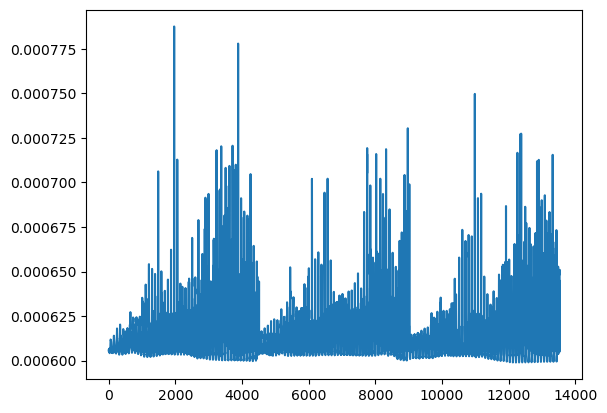

In [30]:
import matplotlib.pyplot as plt
plt.plot(cams.co2.values.flatten())